In [1]:
import pandas as pd
from statsmodels.nonparametric.kernel_regression import KernelReg
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s0_heatmap_raw=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/non_para_s0_sortByK10_reordered_rsquare_0.8.heat_no_HP.csv')

In [3]:
s0_heatmap_raw

def convert_to_one_row(df):
    df.index = df.index + 1
    df_out = df.stack()
    df_out.index = df_out.index.map('{0[1]}_{0[0]}'.format)
    return(df_out.to_frame())



In [4]:
cluster_no=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/reorder_cluster_in_10/bar_reorder_cluster_in_10.csv',index_col=0)

In [5]:
time_df=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/bar_pseudotime_noHP_allcell.csv',index_col=0)
time=time_df.loc['time',]
time


400.0      0.090547
4802.0     0.093773
6769.0     0.097471
4543.0     0.097574
4758.0     0.098463
             ...   
11122.0    0.999351
3784.0     0.999367
11473.0    0.999785
11604.0    0.999789
12093.0    0.999826
Name: time, Length: 9815, dtype: float64

In [6]:
cluster_no_list=[1]
for i in cluster_no_list:
    one_cluster=cluster_no[cluster_no.cluster_of_10==i]
    one_cluster_idx=one_cluster.index
    one_cluster_heatmap=s0_heatmap_raw.loc[one_cluster_idx,]

In [7]:
one_cluster_heatmap

,genename,400,4802,6769,4543,4758,4421,4851,6610,6607,...,11751,3930,11886,7982,11435,11122,3784,11473,11604,12093
0,3632451O06Rik,0.460269,0.547714,0.662784,0.639182,0.412890,0.446849,0.289543,0.430582,0.507381,...,0.000000,0.005267,0.006137,0.000000,0.000000,0.005817,0.005438,0.000000,0.006137,0.005483
1,Ablim1,0.437539,0.508333,0.401953,0.441548,0.343543,0.506206,0.420132,0.525218,0.462310,...,0.005374,0.000000,0.000000,0.005982,0.000000,0.005982,0.005593,0.000000,0.006311,0.005639
2,Afdn,0.611458,0.799459,0.818547,0.755192,0.620240,0.640561,0.659508,0.618888,0.810864,...,0.033580,0.039988,0.040968,0.028470,0.028845,0.038565,0.026054,0.015338,0.040766,0.036220
3,Amot,0.524645,0.658351,0.706745,0.557881,0.562654,0.375068,0.693639,0.402397,0.541343,...,0.077565,0.034457,0.037778,0.069454,0.039320,0.062338,0.036555,0.029549,0.046606,0.048261
4,Amotl1,0.139043,0.115425,0.120398,0.145072,0.144823,0.147142,0.159108,0.142506,0.108683,...,0.006186,0.000000,0.000000,0.000000,0.007198,0.000000,0.000000,0.007400,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Wwtr1,0.113183,0.099171,0.191934,0.112056,0.134505,0.187977,0.132203,0.136839,0.156449,...,0.020893,0.027097,0.031572,0.014627,0.024312,0.029924,0.027978,0.009674,0.037946,0.028207
146,Yap1,0.622550,0.509399,0.469811,0.587888,0.414050,0.489309,0.406190,0.488023,0.500137,...,0.013918,0.005333,0.006213,0.011134,0.004951,0.015869,0.019989,0.005636,0.010530,0.010495
147,Zdbf2,0.253037,0.164199,0.201896,0.163655,0.253750,0.260598,0.102355,0.210190,0.239100,...,0.008599,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
148,Zfp516,0.091411,0.032933,0.073772,0.045411,0.076142,0.077334,0.132507,0.132840,0.105310,...,0.000000,0.000000,0.008341,0.000000,0.000000,0.007905,0.000000,0.000000,0.000000,0.000000


In [8]:
one_cluster_heatmap

,genename,400,4802,6769,4543,4758,4421,4851,6610,6607,...,11751,3930,11886,7982,11435,11122,3784,11473,11604,12093
0,3632451O06Rik,0.460269,0.547714,0.662784,0.639182,0.412890,0.446849,0.289543,0.430582,0.507381,...,0.000000,0.005267,0.006137,0.000000,0.000000,0.005817,0.005438,0.000000,0.006137,0.005483
1,Ablim1,0.437539,0.508333,0.401953,0.441548,0.343543,0.506206,0.420132,0.525218,0.462310,...,0.005374,0.000000,0.000000,0.005982,0.000000,0.005982,0.005593,0.000000,0.006311,0.005639
2,Afdn,0.611458,0.799459,0.818547,0.755192,0.620240,0.640561,0.659508,0.618888,0.810864,...,0.033580,0.039988,0.040968,0.028470,0.028845,0.038565,0.026054,0.015338,0.040766,0.036220
3,Amot,0.524645,0.658351,0.706745,0.557881,0.562654,0.375068,0.693639,0.402397,0.541343,...,0.077565,0.034457,0.037778,0.069454,0.039320,0.062338,0.036555,0.029549,0.046606,0.048261
4,Amotl1,0.139043,0.115425,0.120398,0.145072,0.144823,0.147142,0.159108,0.142506,0.108683,...,0.006186,0.000000,0.000000,0.000000,0.007198,0.000000,0.000000,0.007400,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Wwtr1,0.113183,0.099171,0.191934,0.112056,0.134505,0.187977,0.132203,0.136839,0.156449,...,0.020893,0.027097,0.031572,0.014627,0.024312,0.029924,0.027978,0.009674,0.037946,0.028207
146,Yap1,0.622550,0.509399,0.469811,0.587888,0.414050,0.489309,0.406190,0.488023,0.500137,...,0.013918,0.005333,0.006213,0.011134,0.004951,0.015869,0.019989,0.005636,0.010530,0.010495
147,Zdbf2,0.253037,0.164199,0.201896,0.163655,0.253750,0.260598,0.102355,0.210190,0.239100,...,0.008599,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
148,Zfp516,0.091411,0.032933,0.073772,0.045411,0.076142,0.077334,0.132507,0.132840,0.105310,...,0.000000,0.000000,0.008341,0.000000,0.000000,0.007905,0.000000,0.000000,0.000000,0.000000


0.3375906745201693


KeyError: (slice(None, None, None), None)

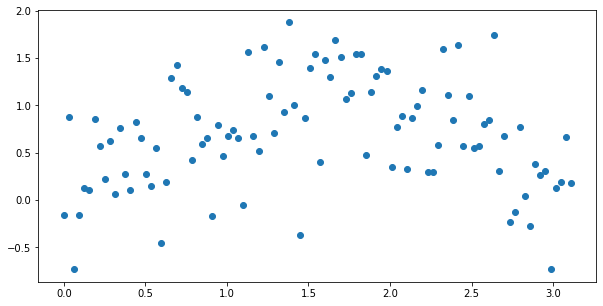

In [10]:
def non_para_kernel_test(X,Y):
    # RAW VERSION
    # Usage: Gene pseudotime fitting and r square (moved to utilities)
    # input: X,Y
    # return: estimator, r_square
    # example: 
    # X = pd.DataFrame(np.arange(100)*np.pi/100)
    # Y = pd.DataFrame(np.sin(X)+np.random.normal(loc = 0, scale = 0.5, size = (100,1)))
    # estimator,r_square=non_para_kernel(X,Y)
    
    # X2=pd.DataFrame(np.random.randint(0,100,size=[200,1]))
    # Y2=pd.DataFrame(np.random.normal(9,5,size=[200]))
    # X = pd.DataFrame(np.arange(100)*np.pi/100)
    # Y = pd.DataFrame(np.sin(X)+np.random.normal(loc = 0, scale = 0.5, size = (100,1)))
    
    kde=KernelReg(endog=Y,
                           exog=X,
                           var_type='c',#变量的类型
                           #ckertype='gaussian',#用于连续变量的内核
                           #bw='cv_ls'#带宽，数值：指定带宽； ‘cv_ls’：最小二乘交叉验证； ‘aic’：AIC Hurvich带宽估计
                           )
    #X=merged.time
    #Y=merged.s0
    print(kde.r_squared())
    n=X.shape[0]

    estimator = kde.fit(X)
    estimator = np.reshape(estimator[0],[n,1])

    fig, ax = plt.subplots(figsize=(10,5))
    ax.scatter(X,Y)
    #print('estimator')
    #print(estimator)
    ax.plot(X, estimator, '-', alpha=0.8)
    return(estimator,kde.r_squared())

from utilities import non_para_kernel
X = pd.DataFrame(np.arange(100)*np.pi/100)
Y = pd.DataFrame(np.sin(X)+np.random.normal(loc = 0, scale = 0.5, size = (100,1)))
# Y=convert_to_one_row(one_cluster_heatmap[one_cluster_heatmap.columns[1:]])
# gene_amt=len(one_cluster_heatmap)
# X=pd.DataFrame(pd.concat([time] * gene_amt))
estimator,r_square=non_para_kernel_test(X,Y)